# Task 1: Thêm thư viện và đọc dữ liệu

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
filename = input('Vui lòng nhập đường dẫn của file: ')
df = pd.read_csv(filename)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Task2: Làm sạch và xử lý dữ liệu

### Task 2.1: Hợp dữ liệu của 12 tháng

In [13]:
path = 'D:/Course/KHDL/AnalyzeSaleProject/data/'
frames = []
all_lenght =[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        # lấy đường dẫn
        filepath = path + file
        # đọc file
        df1 = pd.read_csv(filepath)
        # thêm vào list frames
        frames.append(df1)
        # Hợp lại thành 1
        result = pd.concat(frames)
        # Tính độ dài từng file
        lenght_1m = len(df1.index)
        all_lenght.append(lenght_1m)
total_lenght = sum(all_lenght)      
print("Độ dài của 12 tệp là: " + str(total_lenght) )        
df = result
df.to_csv('TongHopDuLieu12Thang.csv', index= False)


Độ dài của 12 tệp là: 186850


### Task 2.2: Thêm cột 'month'

In [14]:
# Tạo cột Month và cắt tháng trong cột Order Date để thêm vào.
df['Month'] = df['Order Date'].str.slice(start = 0, stop = 2)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### Task 2.3: Tìm giá trị 'NaN' và 'Or'

In [15]:
# Loại bỏ giá trị NaN
df = df.dropna(how ='all')
# Loại bỏ giá trị Or
df = df[df['Month'] != 'Or']
df.head()
print(set(df['Month']))

{'08', '02', '10', '05', '03', '04', '12', '09', '01', '06', '11', '07'}


# Task 3: Reporting

### Task 3.1: Tháng nào có doanh số cao nhất và doanh số kiếm được là bao nhiêu?
### What was the best month for sale ? How much was earned that month?

In [16]:
# Chuyển kiểu dữ liệu từ Str thành Int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast="integer",  errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast="float",  errors='coerce')

# Thêm cột Sales và tính tổng
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

# Chuyển cột sales sai cột Price Each cho dễ nhìn
moving_c = df.pop("Sales")
df.insert(4, 'Sales', moving_c)

# Tính tổng doanh thu của từng tháng và lấy doanh thu tháng cao nhất
sales_value = df.groupby('Month').sum()['Sales']
sales_value





Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

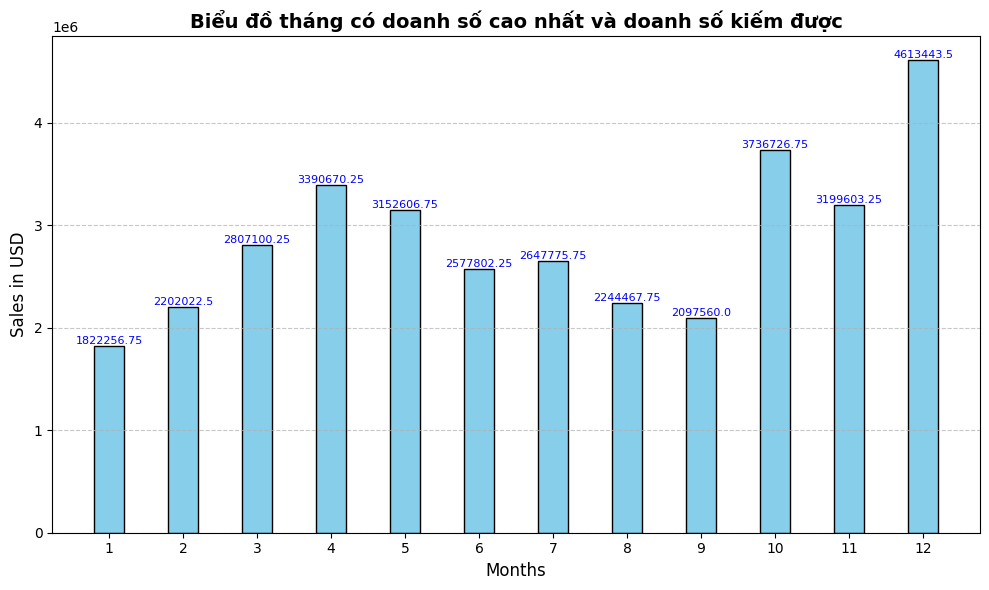

In [17]:

# In ra biểu đồ thể hiện đánh giá trực quan
months = range(1,13)
plt.figure(figsize=(10, 6))
bars = plt.bar(x=months, height=sales_value, color='skyblue', edgecolor='black', width = 0.4)
plt.xticks(months)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Sales in USD', fontsize=12)
plt.title('Biểu đồ tháng có doanh số cao nhất và doanh số kiếm được', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+ 0.2, yval + 50 , f'{yval}', va='bottom', ha='center', fontsize=8, color='blue')
plt.tight_layout()
plt.show()

### Task 3.2: Thành phố nào có doanh số cao nhất? What city has the best sales?

In [18]:
# Lấy phần tử trong cột Purchase Address
address_to_city = lambda address:address.split(',')[1]
# Thêm phần tử vừa lấy vào cột mới có tên là City
df['City'] = df['Purchase Address'].apply(address_to_city)
# Tính tổng doanh thu của từng thành phố
sales_value_city = df.groupby('City').sum()['Sales']
# Tìm thành phố có doanh thu lớn nhất bằng hàm Max
sales_value_city.max()
# Lặp qua cột city và sale để lấy giá trị
cities = []
for city, sales in sales_value_city.items():
    cities.append(city)

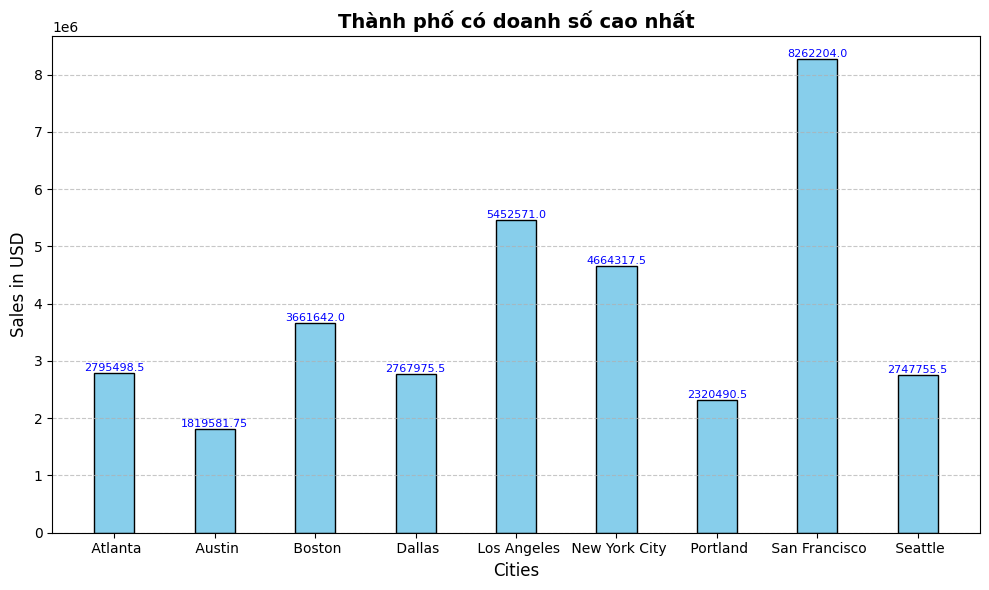

In [19]:
# In ra biểu đồ thể hiện đánh giá trực quan
plt.figure(figsize=(10, 6))
bars = plt.bar(x=cities, height=sales_value_city, color='skyblue', edgecolor='black', width = 0.4)
plt.xticks(cities)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Sales in USD', fontsize=12)
plt.title('Thành phố có doanh số cao nhất', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+ 0.2, yval + 50 , f'{yval}', va='bottom', ha='center', fontsize=8, color='blue')
plt.tight_layout()
plt.show()

### Task 3.3: Doanh nghiệp cần chiếu quảng cáo vào thời giang nào để tăng khả năng mua hàng của khách hàng? What time should we display ads to maximize the likelihood of customer's buying product?

In [20]:
# Chuyển đổi phương thức từ str sang dateTime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Lấy tạo cột mới 'Hours' và gán giờ
df['Hours'] = df['Order Date'].dt.hour

C:\Users\ThienThach\AppData\Local\Temp\ipykernel_4252\1583004118.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
# Tính tổng số đơn của từng giờ
sales_value_hours = df.groupby('Hours').count()['Sales']
# Lặp qua các cột Hours và Sales để lấy giá trị
hours = []
for hour, sales in sales_value_hours.items():
    hours.append(hour)

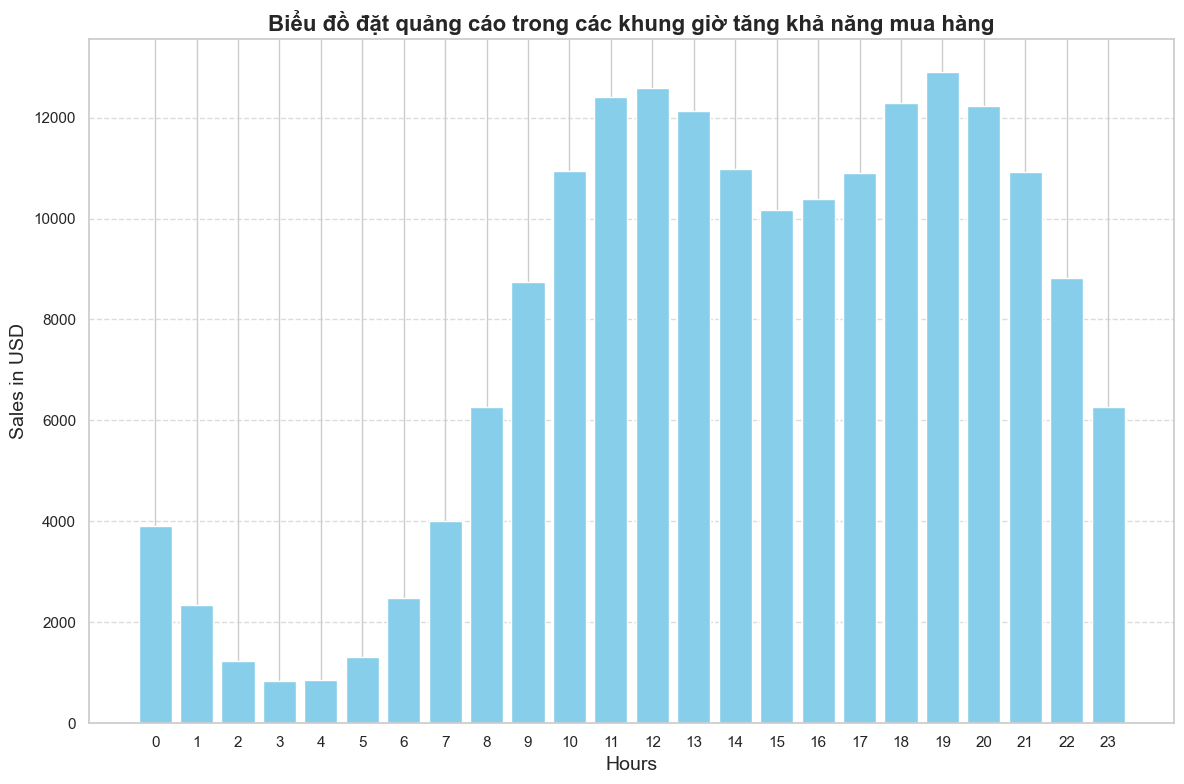

In [ ]:
# In ra biểu đồ thể hiện đánh giá trực quan
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Vẽ biểu đồ
bars = plt.bar(hours, sales_value_hours, color='skyblue')

# Thêm nhãn trên các thanh
for bar in bars:
    yval = bar.get_height()

# Tùy chỉnh trục và tiêu đề
plt.xticks(hours)
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Sales in USD', fontsize=14)
plt.title('Biểu đồ đặt quảng cáo trong các khung giờ tăng khả năng mua hàng', fontsize=16, fontweight='bold')

# Thêm đường lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tăng khoảng cách các yếu tố của biểu đồ để không bị chồng lên nhau
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### Task 3.4: Những sản phẩm nào thường được bán cùng nhau? What product are most often sold together?

In [ ]:
# Tìm ra các hàng bị lặp lại
df_dup = df[df['Order ID'].duplicated(keep = False)]
# Gộp các sản phẩm có ID đơn hàng giống nhau
groupProduct = lambda product: ', '.join(product)
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
# Bỏ lặp các cột 
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()
# Đưa ra sản phẩm thường bán cùng nhau
df_dup['All Product'].value_counts()

C:\Users\ThienThach\AppData\Local\Temp\ipykernel_14568\1537384352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


All Product
iPhone, Lightning Charging Cable             882
Google Phone, USB-C Charging Cable           856
iPhone, Wired Headphones                     361
Vareebadd Phone, USB-C Charging Cable        312
Google Phone, Wired Headphones               303
                                            ... 
20in Monitor, iPhone                           1
LG Dryer, Vareebadd Phone                      1
LG Dryer, Lightning Charging Cable             1
ThinkPad Laptop, LG Dryer                      1
LG Washing Machine, AA Batteries (4-pack)      1
Name: count, Length: 366, dtype: int64

### Task 3.5 Sản phẩm nào được bán nhiều nhất? Tại sao bạn nghĩ nó được bán nhiều nhất? What product solod the most? Why do you think it sold the most?

C:\Users\ThienThach\AppData\Local\Temp\ipykernel_14568\4184627104.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=90, size=12)


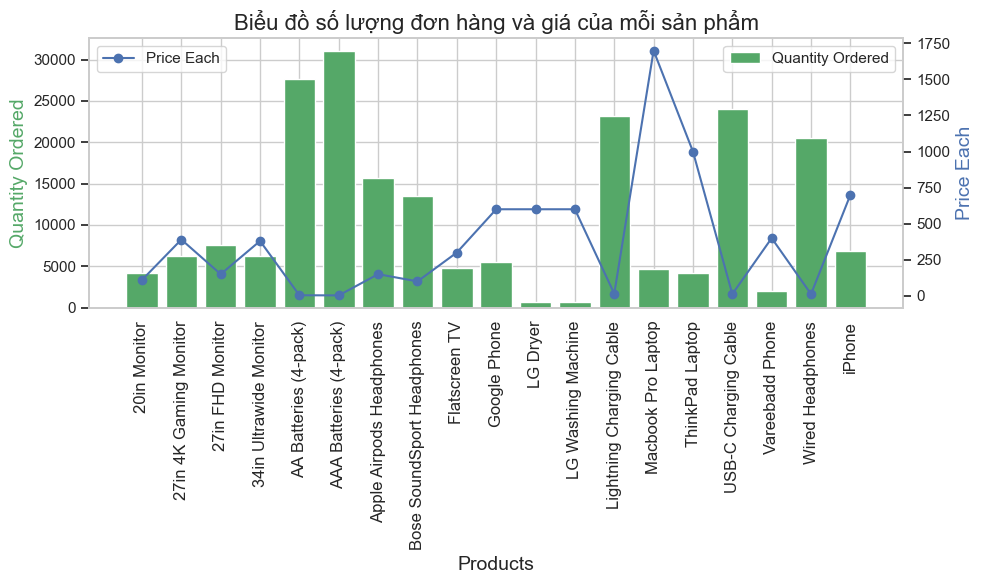

In [ ]:
# Giá của từng sản phẩm
prices = df.groupby('Product')['Price Each'].mean()

# Cộng tất cả số lượng của từng sản phẩm 
numeric_cols = df.select_dtypes(include=['number']).columns
all_products = df.groupby('Product')[numeric_cols].sum()['Quantity Ordered']

# Sản phẩm bán ra
products_ls = [product for product, quant in all_products.items()]
# In ra biểu đồ thể hiện đánh giá trực quan
x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots(figsize=(10, 6)) 
ax2 = ax1.twinx()

# Vẽ biểu đồ cột cho số lượng đặt hàng
ax1.bar(x, y1, color='g', align='center')
# Vẽ biểu đồ đường cho giá của từng sản phẩm
ax2.plot(x, y2, 'b-o')

# Thiết lập các nhãn và tiêu đề
ax1.set_xticklabels(products_ls, rotation=90, size=12)
ax1.set_xlabel('Products', fontsize=14)
ax1.set_ylabel('Quantity Ordered', color='g', fontsize=14)
ax2.set_ylabel('Price Each', color='b', fontsize=14)
ax1.set_title('Biểu đồ số lượng đơn hàng và giá của mỗi sản phẩm', fontsize=16)

# Thêm chú thích (legend)
ax2.legend(['Price Each'], loc='upper left')
ax1.legend(['Quantity Ordered'], loc='upper right')
# Loại bỏ lưới
ax1.grid(True)
ax2.grid(False)
# Sử dụng tight_layout để tránh chồng lấn các nhãn
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()